In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('COVID-19.csv')
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [3]:
# 318,438 patient records and 18 feature columns 

df.shape

(318438, 18)

In [4]:
# Get info on df and check missing values, and data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
num_data = df[['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']]
cat_data = df[['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']]


In [6]:
'''
Column Descriptions 

case_id --> Case_ID registered in Hospital
Hospital_code --> Unique code for the Hospital
Hospital_type_code --> Unique code for the type of Hospital
City_Code_Hospital --> City Code of the Hospital
Hospital_region_code --> Region Code of the Hospital
Available Extra Rooms in Hospital --> Number of Extra rooms available in the Hospital
Department --> Department overlooking the case
Ward_Type --> Code for the Ward type
Ward_Facility_Code --> Code for the Ward Facility
Bed Grade --> Condition of Bed in the Ward
patientid --> Unique Patient Id
City_Code_Patient --> City Code for the patient
Type of Admission --> Admission Type registered by the Hospital
Severity of Illness --> Severity of the illness recorded at the time of admission
Visitors with Patient --> Number of Visitors with the patient
Age --> Age of the patient
Admission_Deposit --> Deposit at the Admission Time
Stay --> Stay Days by the patient
'''

'\nColumn Descriptions \n\ncase_id --> Case_ID registered in Hospital\nHospital_code --> Unique code for the Hospital\nHospital_type_code --> Unique code for the type of Hospital\nCity_Code_Hospital --> City Code of the Hospital\nHospital_region_code --> Region Code of the Hospital\nAvailable Extra Rooms in Hospital --> Number of Extra rooms available in the Hospital\nDepartment --> Department overlooking the case\nWard_Type --> Code for the Ward type\nWard_Facility_Code --> Code for the Ward Facility\nBed Grade --> Condition of Bed in the Ward\npatientid --> Unique Patient Id\nCity_Code_Patient --> City Code for the patient\nType of Admission --> Admission Type registered by the Hospital\nSeverity of Illness --> Severity of the illness recorded at the time of admission\nVisitors with Patient --> Number of Visitors with the patient\nAge --> Age of the patient\nAdmission_Deposit --> Deposit at the Admission Time\nStay --> Stay Days by the patient\n'

In [7]:
# Check for duplicates 

df.duplicated().sum()

0

In [8]:
# Summary stats of the numerical columns in the data set 

df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276848,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


array([[<AxesSubplot:title={'center':'case_id'}>,
        <AxesSubplot:title={'center':'Hospital_code'}>,
        <AxesSubplot:title={'center':'City_Code_Hospital'}>],
       [<AxesSubplot:title={'center':'Available Extra Rooms in Hospital'}>,
        <AxesSubplot:title={'center':'Bed Grade'}>,
        <AxesSubplot:title={'center':'patientid'}>],
       [<AxesSubplot:title={'center':'City_Code_Patient'}>,
        <AxesSubplot:title={'center':'Visitors with Patient'}>,
        <AxesSubplot:title={'center':'Admission_Deposit'}>]], dtype=object)

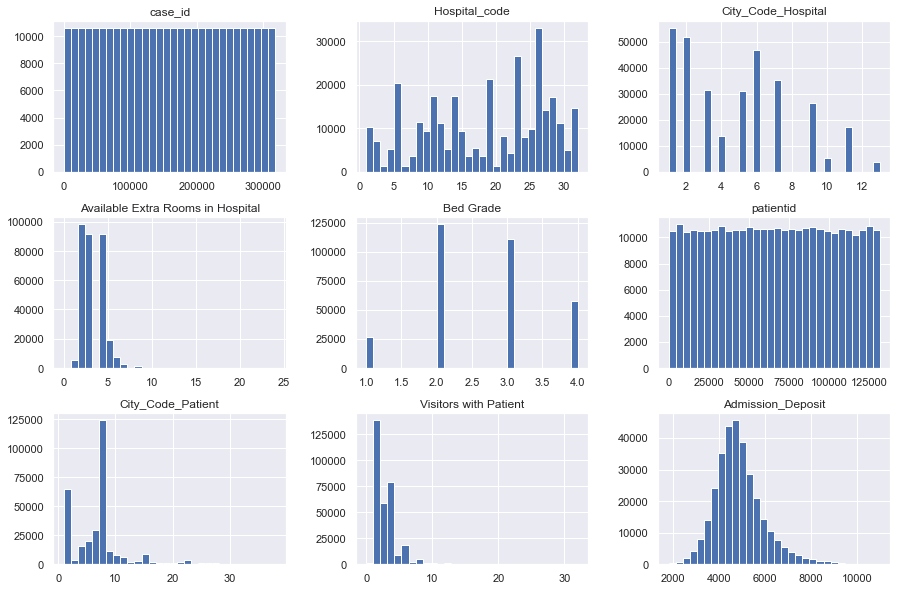

In [9]:
df.hist(bins=30, figsize=(15, 10))

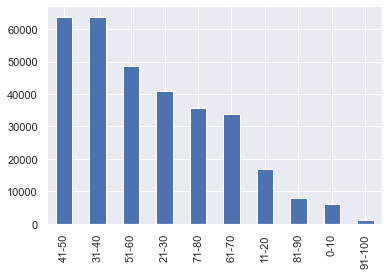

In [10]:
df['Age'].value_counts().plot(kind="bar")

plt.show()

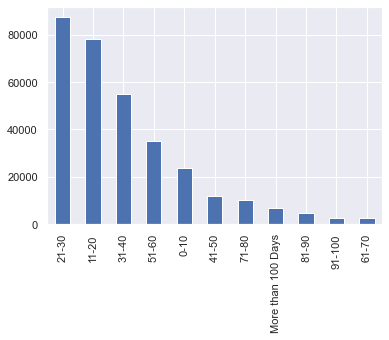

In [11]:
df['Stay'].value_counts().plot(kind="bar")

plt.show()

In [12]:
# Clean this in order to have a better visual 

df['Stay'].value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [13]:
# Check for missing values 

df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

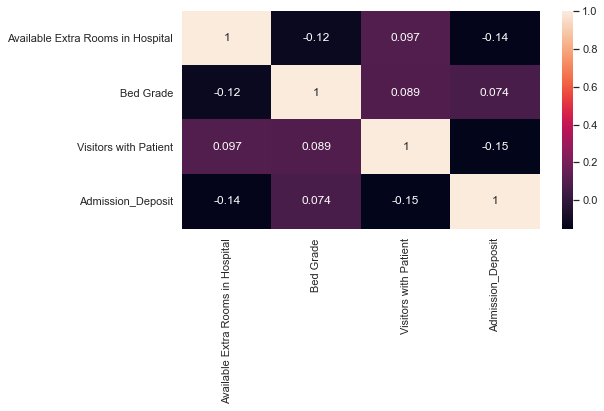

In [14]:
# Heatmap data numeric

cormat = num_data.corr()
fig, ax = plt.subplots(figsize = (8,4))
sns.heatmap(data = cormat, annot=True)
plt.show()

In [15]:
# Drop unimportant aspects 

df = df.drop(['case_id','patientid'], axis=1)
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,8,c,3,Z,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,c,5,Z,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,10,e,1,X,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,26,b,2,Y,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,26,b,2,Y,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,a,6,X,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,24,a,1,X,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,7,a,4,X,3,gynecology,R,F,4.0,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,11,b,2,Y,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,5,11-20,3761.0,11-20


In [16]:
le = LabelEncoder()

for col in cat_data: 
    df[col] = le.fit_transform(df[col])

df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,7,2,2,2,3,3,2,5,2.0,6,0,0,2,5,4911.0,0
1,1,2,4,2,2,3,3,5,2.0,6,1,0,2,5,5954.0,4
2,9,4,0,0,2,1,3,4,2.0,6,1,0,2,5,4745.0,3
3,25,1,1,1,2,3,2,3,2.0,6,1,0,2,5,7272.0,4
4,25,1,1,1,2,3,3,3,2.0,6,1,0,2,5,5558.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,5,0,5,0,3,3,1,5,4.0,21,0,2,3,4,4144.0,1
318434,23,0,0,0,2,1,1,4,4.0,7,2,2,4,8,6699.0,3
318435,6,0,3,0,3,2,2,5,4.0,9,0,1,3,7,4235.0,1
318436,10,1,1,1,3,1,1,3,3.0,7,1,1,5,1,3761.0,1


In [17]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].median(), inplace=True)
df['Bed Grade'].fillna(df['Bed Grade'].median(), inplace=True)

df.isnull().sum()

Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [19]:
target_le = LabelEncoder()

target = target_le.fit_transform(df['Stay'])

In [20]:
df_new = df[:len(df)]

check = pd.concat([df_new, pd.DataFrame(data=target, columns=['Stay'])], axis=1)
check.corr()['Stay']

,Stay,Stay
Hospital_code,0.042846,0.042846
Hospital_type_code,0.058592,0.058592
City_Code_Hospital,0.002084,0.002084
Hospital_region_code,0.011905,0.011905
Available Extra Rooms in Hospital,-0.121120,-0.121120
Department,0.033287,0.033287
Ward_Type,0.185191,0.185191
Ward_Facility_Code,-0.004552,-0.004552
Bed Grade,0.025761,0.025761
City_Code_Patient,-0.000786,-0.000786


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_new, target, test_size=0.2, random_state=42)

In [22]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
tree_clf.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

def plot_feature_importances(model):
    n_features = df_new.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), df_new.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

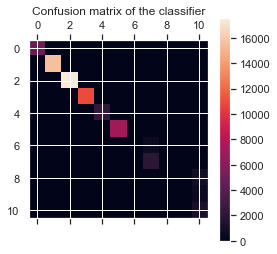

In [29]:
pred = tree_clf.predict(X_test)

cm = confusion_matrix(y_test, pred)
pl.matshow(cm)
pl.title('Confusion Matrix')
pl.colorbar()
pl.show()